# Theoretical performance of Bagging Ensemble

In [2]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

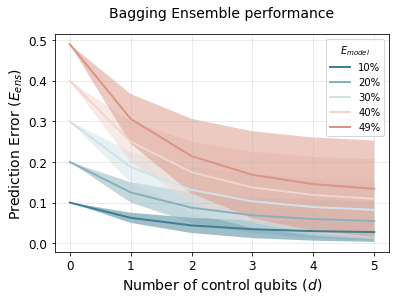

In [3]:

q = np.arange(6)
T = 2**q

colors = ['lawngreen', 'lightgreen', 'g', 'palegoldenrod']

errs = np.array([0.1, 0.2, 0.3, 0.4, 0.49])
ro = [0.00, 0.25, 0.5] #np.arange(0.5, 1, 0.05)

import seaborn as sns

colors = sns.diverging_palette(220, 20, n=6)
# colors = colors[::-1]


# plot it!
fig, ax = plt.subplots(1)

for i in np.arange(len(errs)):
    err = errs[i]
    color = colors[i]
    # print(err)
    mean = ((1+ro[1]*(T-1))/T)*err
    lower = mean - ((1+ro[0]*(T-1))/T)*err
    upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
    ax.plot(q, mean, lw=2, label = str(int(err*100))+'%', color=color)
    ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
#ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.set_title('Bagging Ensemble performance', size=14).set_position([.5, 1.05])
ax.legend(loc='upper right', title = '$E_{model}$', prop=dict(size=10))
ax.set_xlabel(r'Number of control qubits $(d)$', size=14)
ax.set_ylabel('Prediction Error ($E_{ens}$)', size=14)
ax.set_yticklabels([0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5], size=12)
ax.set_xticklabels([0, 0, 1, 2, 3, 4, 5], size=12)
ax.grid(alpha=.3)
# ax1 = ax.twiny()
# ax1.set_xlabel(r'Ensemble size $(B)$', size=14)
# ax1.set_xticklabels([1, 2, 4, 8, 16, 32], size=12)
# #ax1.set_xticks(np.linspace(.48, ax.get_xbound()[1]+5, 5))
plt.savefig('output/theory_ensemble_performance.png', dpi =300)
plt.show()

In [4]:
n_shots = 1000
n=1000
x = []
x_err = []
P0 = []
P1 = []

for i in np.arange(n):
    '''Random generation of vectors'''
    x_train = [random.uniform(-1, 1), random.uniform(0, 1)]
    x_train_norm = normalize_custom(x_train)
    x_test = [random.uniform(-1, 1), random.uniform(0, 1)]
    x_test_norm = normalize_custom(x_test)

    '''Compute cosine distance and append it to x'''
    d_cos = cosine_similarity([x_train], [x_test])[0][0]
    x.append(d_cos)

    '''If x_train belongs to class 0'''
    qc = cos_classifier(x_train_norm, x_test_norm, [1,0])
    r = exec_simulator(qc, n_shots)
    P_q = r['0']/n_shots
    P0.append(P_q)
    d_cos_err = np.sqrt(2*P_q-1)
    x_err.append( d_cos_err )


P0 = np.array(P0)
x = np.array(x)
x_err = np.array(x_err)

order = x.argsort()

x = x[order[::-1]]
P0 = P0[order[::-1]]
x_err = x_err[order[::-1]]

err = [ abs(x1 - x2) for (x1, x2) in zip(abs(x), x_err)]
err = np.array(err)
P1 = 1-P0

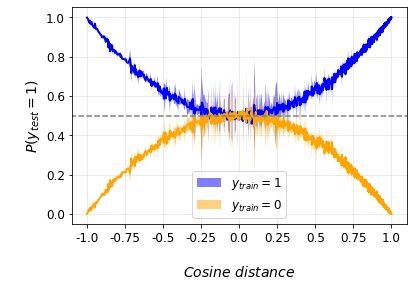

In [15]:
fig, ax = plt.subplots(1)
ax.plot(x, P0 , lw=2, color='blue')
ax.fill_between(x, P0 - err, P0 + err, facecolor = 'blue', label='$y_{train} = 1$', alpha=0.5)
ax.plot(x, P1 , lw=2, color='orange')
ax.fill_between(x, P1 - err, P1 + err, facecolor = 'orange', label='$y_{train} = 0$' , alpha=0.5)
#ax.plot(q, mean, lw=2, label = str(np.round(err, 1)), color=color)
#ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
#ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
#ax.set_title(r'Quantum cosine classifier', size=14).set_position([.5, 1.05])
ax.legend(loc='center lower', prop=dict(size=12))
ax.set_xlabel('\n$Cosine$ $distance$', size = 14)
ax.set_ylabel('\n$P(y_{test} = 1)$',size = 14)
ax.axhline(y=.5, xmin=-1, xmax=1, color = 'gray', linestyle = '--')
ax.set_xticklabels([0, -1.00, -0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00], size=12)
#ax.set_yticklabels([0, .2, .4, 0.2, 0.3, 0.4, 0.5], size=12)
ax.set_yticklabels([0, 0.0, .2, .4, .6, 0.8, 1.0], size=12)
ax.grid(alpha=.3)
plt.savefig('output/cos_classifier_behaviour.png', dpi = 300)
plt.show()